##CAD_dimensions
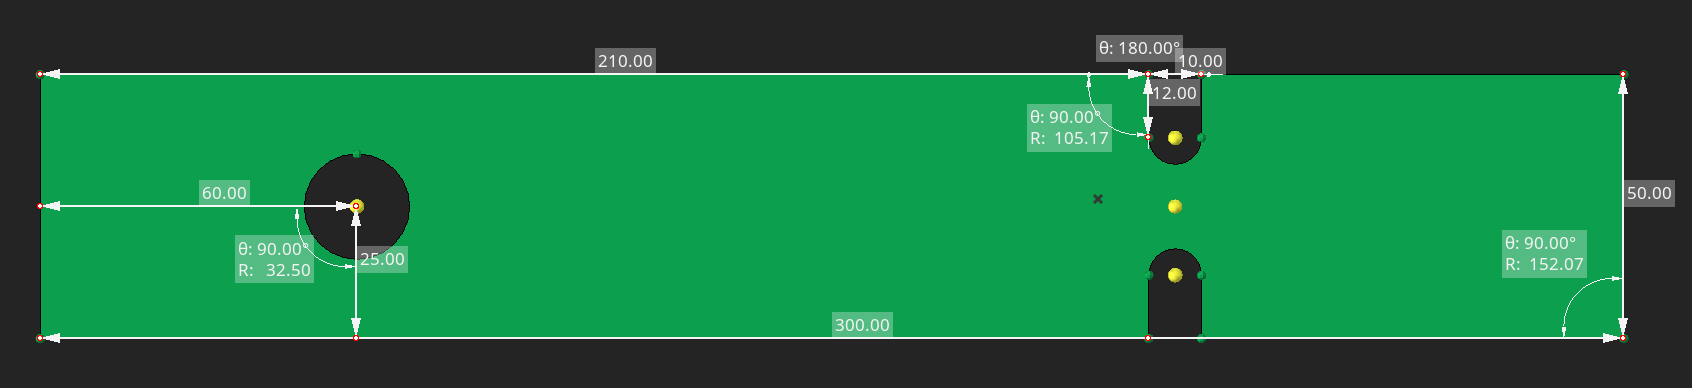

### Boundary Conditions
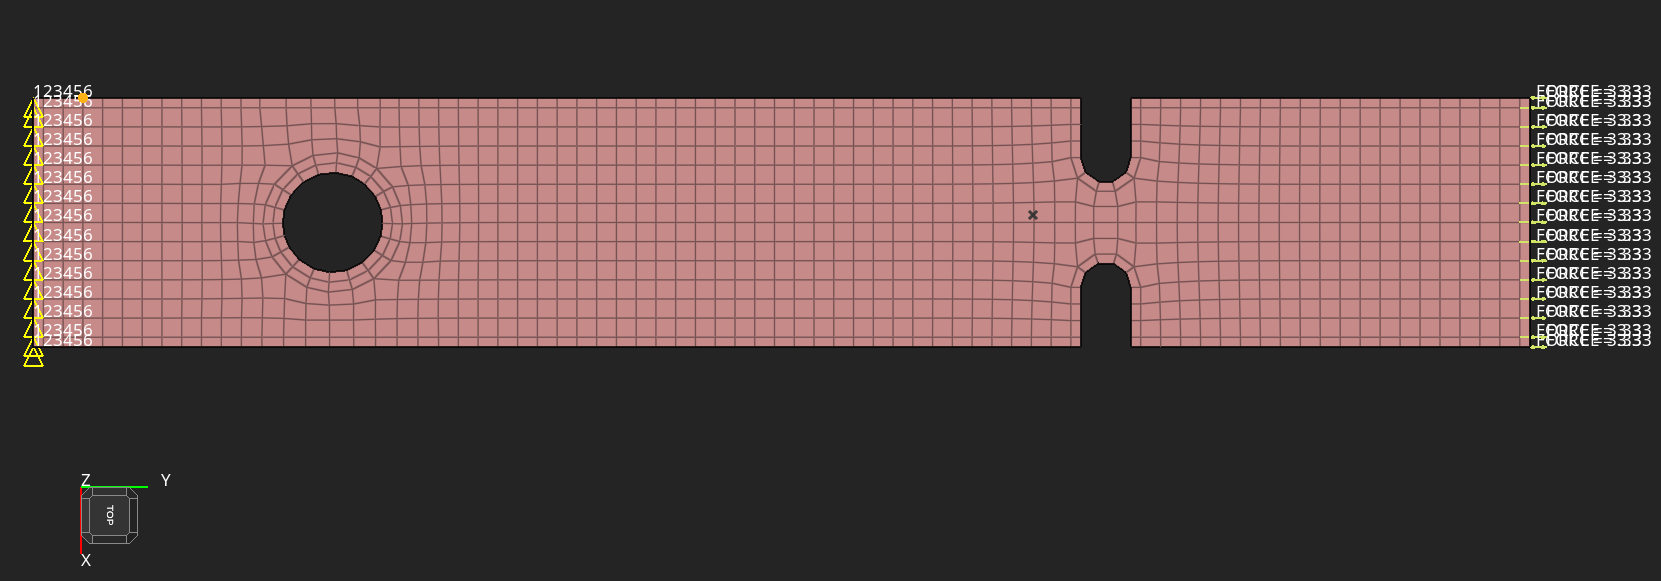

## Thickness=3mm   ## E=210GPa   ## Nu=0.3   ## Rho=6780kg/m^3
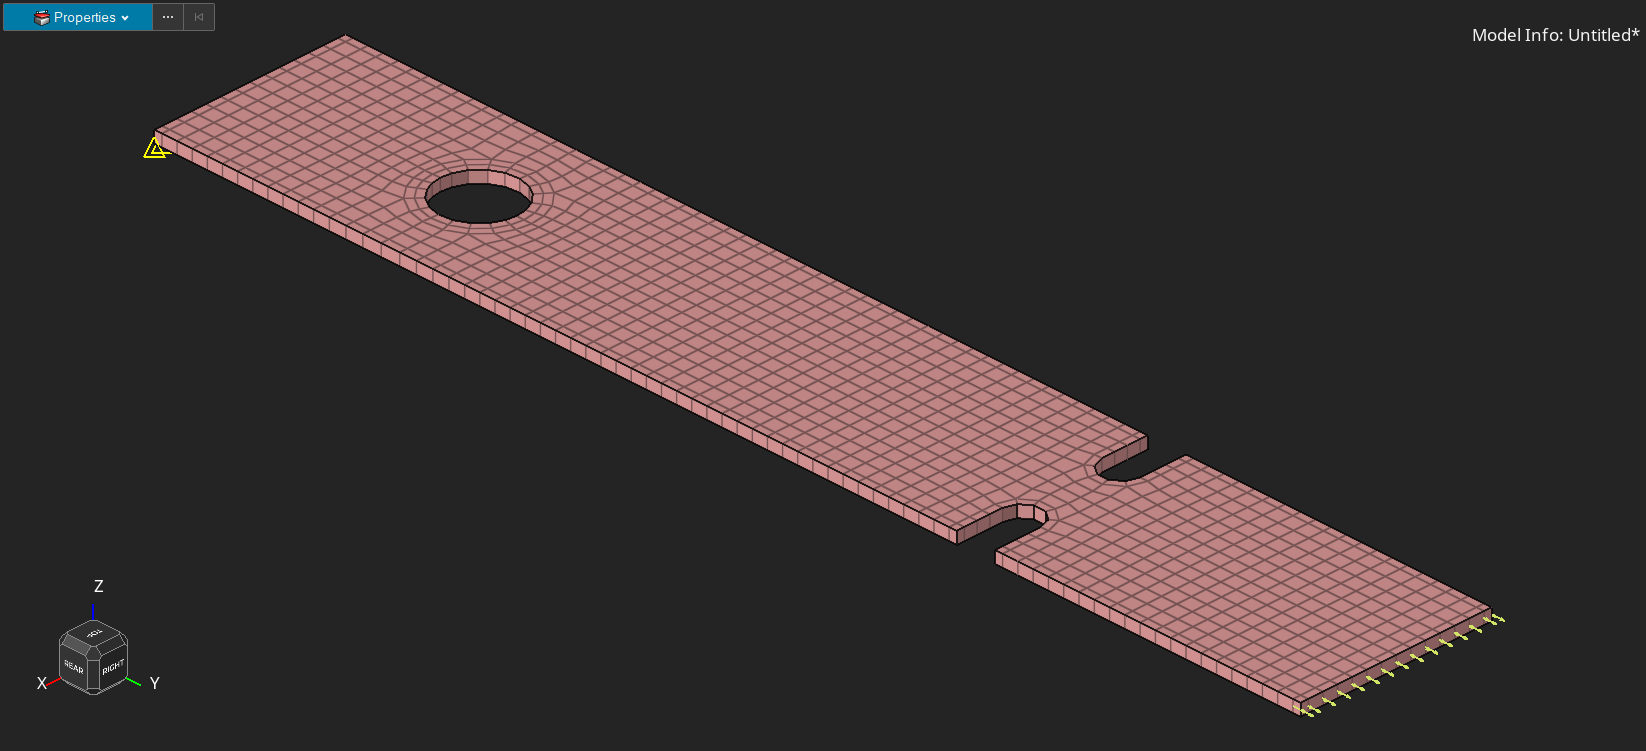

In [898]:
#import Libraries
import numpy as np
import math
import matplotlib.pyplot as plt

In [899]:
##Plate Dimensions in mm
L=300
W=50
T=3

##big hole dimension and loaction
R1=10
R1x=60
R1y=25

##Slot dimensions and position
SW=10  ##SlotWidth
SL=12   ##SlotLength
SR=5  ##SlotRadius
##Slot 1
SR1x=215
SR1y=12
##Slot2
SR2x=215
SR2y=38

In [900]:
## create a grids
Grids=[]
for x in np.linspace(0,L,300):
    if (50<=x<=71):
        y0=math.sqrt(abs((R1**2)-((x-R1x)**2)))
        print(y0)
        y1=y0+R1y
        print(y1)
        #for y in np.linspace(,y1,12):
        #   Grids.append([x,y])
        for y in np.linspace(y1,W,10):
            Grids.append([x,y])
    #else:
        #for y in np.linspace(0,W,50):
            #Grids.append([x,y])
#print(Grids)

1.8211308883026065
26.821130888302605
4.694799301292124
29.694799301292125
6.225139592728846
31.225139592728844
7.310963351089361
32.31096335108936
8.132318672767779
33.13231867276778
8.763882049205556
33.763882049205556
9.244633570444604
34.244633570444606
9.597263715958814
34.59726371595882
9.83556259285619
34.83556259285619
9.9677335390142
34.9677335390142
9.997986396972607
34.99798639697261
9.927252982863598
34.9272529828636
9.753336417860469
34.75333641786047
9.470553863244568
34.47055386324457
9.068726998632942
34.06872699863294
8.531050813195035
33.53105081319504
7.829587874298459
32.82958787429846
6.914670222640514
31.914670222640513
5.684143030998233
30.684143030998232
3.846153846153856
28.846153846153857
2.176484201140316
27.176484201140315


In [901]:
## display grids
Nodes=np.array(Grids)
plt.plot(Nodes[:,0],Nodes[:,1],".")
plt.show()

##write file
file=open("E:\\New folder\\p1.dat","w")
for i,node in enumerate(Nodes):
    file.write ("{}, {}, {}\n".format(i,node[0],node[1]))

In [902]:
##Meshing
from scipy.spatial import Delaunay
tria=Delaunay(Nodes)

<function matplotlib.pyplot.show(close=None, block=None)>

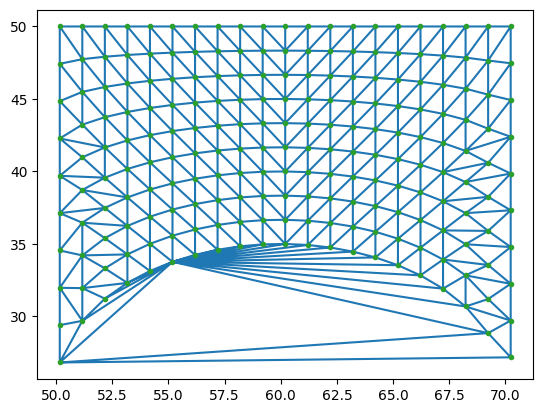

In [903]:
## Dispaly Mesh
plt.triplot(Nodes[:,0],Nodes[:,1],tria.simplices)
plt.plot(Nodes[:,0],Nodes[:,1],".")
plt.show

In [904]:
## collect unwanted elements
randompoints=[]  ## random point list
r2=9.94  ## radius of random circle
rp2=R1x+r2 ##
for i in np.linspace(51.5,69.2,100):
        y0=math.sqrt(abs((r2**2)-((i-R1x)**2)))
        print(y0)
        y=y0+R1y
        randompoints.append([i,y])

c=tuple(tria.find_simplex(randompoints))

5.153018532860132
5.437005502461118
5.7012741958602575
5.9484532332169024
6.1805933427100905
6.39933137577145
6.605998776469058
6.801695920966003
6.987344614133288
7.163726118496326
7.331509314854102
7.491271958456426
7.643516995867526
7.788685278368419
7.9271656002399205
8.059302719874621
8.185403838316525
8.305743883053001
8.420569855669799
8.530104438185646
8.634549006595023
8.734086166109469
8.82888189724812
8.919087382848277
9.004840571548629
9.086267522141872
9.163483564542974
9.236594306353684
9.305696508670291
9.370878850544843
9.432222598120545
9.489802191731933
9.543685762047152
9.593935584524214
9.64060847997135
9.683756167778496
9.723425577371263
9.75965912259052
9.79249494298813
9.821967115426977
9.848105838860933
9.8709375947314
9.890485285038025
9.906768349811292
9.91980286542474
9.929601624926956
9.936174201341897
9.939526994674827
9.939663263165606
9.936583139146745
9.930283629686711
9.920758602025826
9.907998753639003
9.891991566583126
9.872721245603383
9.850168639278

In [905]:
## random points
for i in randompoints:
    print(i)

[51.5, 30.15301853286013]
[51.67878787878788, 30.43700550246112]
[51.85757575757576, 30.701274195860258]
[52.03636363636364, 30.948453233216902]
[52.21515151515152, 31.18059334271009]
[52.39393939393939, 31.39933137577145]
[52.57272727272727, 31.605998776469058]
[52.75151515151515, 31.801695920966004]
[52.93030303030303, 31.98734461413329]
[53.10909090909091, 32.16372611849633]
[53.28787878787879, 32.3315093148541]
[53.46666666666667, 32.49127195845642]
[53.64545454545455, 32.64351699586753]
[53.82424242424243, 32.78868527836842]
[54.0030303030303, 32.92716560023992]
[54.18181818181818, 33.05930271987462]
[54.36060606060606, 33.185403838316525]
[54.53939393939394, 33.305743883053]
[54.71818181818182, 33.4205698556698]
[54.8969696969697, 33.530104438185646]
[55.07575757575758, 33.63454900659502]
[55.25454545454546, 33.73408616610947]
[55.43333333333334, 33.828881897248124]
[55.61212121212121, 33.919087382848275]
[55.79090909090909, 34.00484057154863]
[55.96969696969697, 34.0862675221418

In [906]:
print(tria.find_simplex(randompoints))
##delete unwanted elements
Mesh=np.delete(tria.simplices,c,0)

[369 369 369 369 369 369 375 375 375 375 375 375 375 378 378 378 378 378
 375 375 361 363 367 371 371 371 371 371 371 371 371 371 371 371 371 371
 370 370 370 370 370 370 367 367 367 367 367 367 374 374 374 374 374 374
 376 376 376 376 376 373 373 373 373 373 373 366 366 366 366 366 366 362
 362 362 362 362 362 377 377 377 377 377 364 364 364 364 364 364 368 368
 368 368 368 368 372 372 372 372 372   0]


<function matplotlib.pyplot.show(close=None, block=None)>

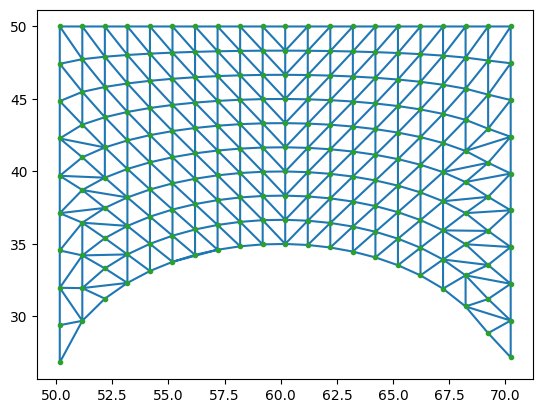

In [907]:
## Dispaly mesh after Deleting unwanted elements
plt.triplot(Nodes[:,0],Nodes[:,1],Mesh)
plt.plot(Nodes[:,0],Nodes[:,1],".")
plt.show